## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units= n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])    
    return model

In [6]:
"""Code Here
設定超參數
"""
Learning_rate = 0.001
epoch = 50
batch_size = 256
momentum = [0.95, 0.5]
nesterov = [True, False]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in momentum:
    for n in nesterov:
        keras.backend.clear_session()
        print('Experiment with Momentum = %.6f'%(m), 'and Nesterov=',bool(n))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr= Learning_rate, nesterov=nesterov, momentum=m)
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
        
        model.fit(x_train, y_train, epochs=epoch, batch_size= batch_size, validation_data=(x_test, y_test), shuffle=True)
        
        # Collect results
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['accuracy']
        valid_acc = model.history.history['val_accuracy']
        
        exp_name_tag = 'Momentum-%s'%str(m) + 'Nesterov-%s'%str(bool(n))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss':valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Momentum = 0.950000 and Nesterov= True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50

50000/50000 [==============================] - 14s 275us/step - loss: 0.9031 - accuracy: 0.6831 - val_loss: 1.3491 - val_accuracy: 0.5455
Epoch 48/50
50000/50000 [==============================] - 14s 274us/step - loss: 0.8890 - accuracy: 0.6889 - val_loss: 1.4091 - val_accuracy: 0.5261
Epoch 49/50
50000/50000 [==============================] - 14s 272us/step - loss: 0.8824 - accuracy: 0.6909 - val_loss: 1.4198 - val_accuracy: 0.5393
Epoch 50/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.8627 - accuracy: 0.6972 - val_loss: 1.4280 - val_accuracy: 0.5282
Experiment with Momentum = 0.950000 and Nesterov= False
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________

50000/50000 [==============================] - 14s 277us/step - loss: 0.9516 - accuracy: 0.6648 - val_loss: 1.3870 - val_accuracy: 0.5231
Epoch 45/50
50000/50000 [==============================] - 14s 273us/step - loss: 0.9409 - accuracy: 0.6697 - val_loss: 1.3816 - val_accuracy: 0.5247
Epoch 46/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.9304 - accuracy: 0.6735 - val_loss: 1.3532 - val_accuracy: 0.5350
Epoch 47/50
50000/50000 [==============================] - 14s 278us/step - loss: 0.9197 - accuracy: 0.6792 - val_loss: 1.4076 - val_accuracy: 0.5274
Epoch 48/50
50000/50000 [==============================] - 14s 277us/step - loss: 0.9053 - accuracy: 0.6811 - val_loss: 1.3621 - val_accuracy: 0.5335
Epoch 49/50
50000/50000 [==============================] - 14s 277us/step - loss: 0.8873 - accuracy: 0.6896 - val_loss: 1.5275 - val_accuracy: 0.4997
Epoch 50/50
50000/50000 [==============================] - 14s 278us/step - loss: 0.8787 - accuracy: 0.6911 - va

50000/50000 [==============================] - 14s 271us/step - loss: 1.5992 - accuracy: 0.4417 - val_loss: 1.6093 - val_accuracy: 0.4391
Epoch 42/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.5944 - accuracy: 0.4427 - val_loss: 1.6004 - val_accuracy: 0.4403
Epoch 43/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.5903 - accuracy: 0.4465 - val_loss: 1.5955 - val_accuracy: 0.4439
Epoch 44/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.5854 - accuracy: 0.4462 - val_loss: 1.5961 - val_accuracy: 0.4410
Epoch 45/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.5814 - accuracy: 0.4485 - val_loss: 1.5897 - val_accuracy: 0.4463
Epoch 46/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.5764 - accuracy: 0.4503 - val_loss: 1.5873 - val_accuracy: 0.4434
Epoch 47/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.5724 - accuracy: 0.4515 - va

50000/50000 [==============================] - 15s 294us/step - loss: 1.6009 - accuracy: 0.4432 - val_loss: 1.6166 - val_accuracy: 0.4358
Epoch 39/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.5957 - accuracy: 0.4449 - val_loss: 1.6072 - val_accuracy: 0.4387
Epoch 40/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.5907 - accuracy: 0.4466 - val_loss: 1.6105 - val_accuracy: 0.4336
Epoch 41/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.5861 - accuracy: 0.4489 - val_loss: 1.5961 - val_accuracy: 0.4437
Epoch 42/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.5809 - accuracy: 0.4497 - val_loss: 1.6005 - val_accuracy: 0.4402
Epoch 43/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5769 - accuracy: 0.4503 - val_loss: 1.5930 - val_accuracy: 0.4411
Epoch 44/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.5718 - accuracy: 0.4536 - va

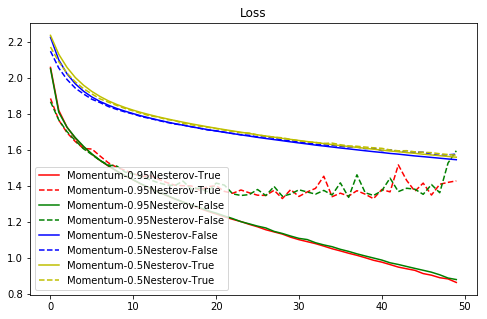

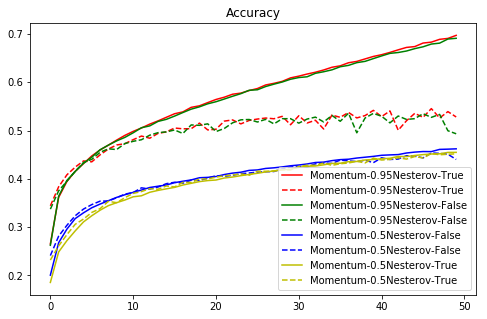

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y','m']

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()